In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [6]:
df=pd.read_csv('Combined_Flights_2022.csv')

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
df.shape

(4078318, 61)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,1636.0,0.0,47.0,70.0,82.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4298,C5,20445,C5,N21144,4298,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1500-1559,21.0,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,1547.0,0.0,57.0,90.0,77.0,376.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4296,C5,20445,C5,N11184,4296,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,11973,1197302,31973,"Gulfport/Biloxi, MS",MS,28,Mississippi,53,0.0,-1.0,1400-1459,16.0,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,1251.0,6.0,49.0,70.0,76.0,251.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4295,C5,20445,C5,N17146,4295,11413,1141307,30285,"Durango, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,0.0,1100-1159,19.0,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [13]:
pd.set_option('display.max_columns',None)

In [14]:
(df.isnull().sum()).sort_values(ascending= False)

AirTime                                    133402
ArrivalDelayGroups                         133402
ArrDel15                                   133402
ArrDelay                                   133402
ActualElapsedTime                          133402
ArrDelayMinutes                            133402
WheelsOn                                   124242
TaxiIn                                     124242
ArrTime                                    124239
TaxiOut                                    122666
WheelsOff                                  122666
DepDelay                                   120495
DepDelayMinutes                            120495
DepartureDelayGroups                       120495
DepDel15                                   120495
DepTime                                    120433
Tail_Number                                 26795
DestState                                       0
DestAirportID                                   0
OriginWac                                       0


In [15]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)


AirTime                            3.271005
ArrivalDelayGroups                 3.271005
ArrDel15                           3.271005
ArrDelay                           3.271005
ActualElapsedTime                  3.271005
ArrDelayMinutes                    3.271005
WheelsOn                           3.046403
TaxiIn                             3.046403
ArrTime                            3.046329
TaxiOut                            3.007760
WheelsOff                          3.007760
DepDelay                           2.954527
DepDelayMinutes                    2.954527
DepartureDelayGroups               2.954527
DepDel15                           2.954527
DepTime                            2.953007
Tail_Number                        0.657011
DestState                          0.000000
DestAirportID                      0.000000
OriginWac                          0.000000
OriginStateName                    0.000000
DestAirportSeqID                   0.000000
DestCityMarketID                

In [16]:
df['Tail_Number'].fillna(df['Tail_Number'].mode()[0], inplace=True)

In [17]:
cols = ["AirTime", "ArrivalDelayGroups", "ArrDel15", "ArrDelay", "ActualElapsedTime", "ArrDelayMinutes", "WheelsOn", "TaxiIn", 
"ArrTime", "TaxiOut", "WheelsOff", "DepDelay", "DepDelayMinutes", "DepartureDelayGroups", "DepDel15", "DepTime"]

for col in cols:
    df[col].fillna(df[col].median(), inplace=True)


In [18]:
## Numerical column
"AirTime" ,"ArrivalDelayGroups", "ArrDel15", "ArrDelay" ,"ActualElapsedTime", "ArrDelayMinutes", "WheelsOn", "TaxiIn", 
"ArrTime", "TaxiOut" , "WheelsOff", "DepDelay", "DepDelayMinutes", "DepartureDelayGroups" , "DepDel15", "DepTime" 
## Categorical column 
"Tail_Number"

'Tail_Number'

In [19]:
# from sklearn.impute import SimpleImputer

# # Create an instance of the SimpleImputer class with strategy as 'mean'
# imputer = SimpleImputer(strategy='mean')

# # Fit the imputer to the DataFrame
# df[["AirTime" ,"ArrivalDelayGroups", "ArrDel15", "ArrDelay" ,"ActualElapsedTime", "ArrDelayMinutes", "WheelsOn", "TaxiIn", 
# "ArrTime", "TaxiOut" , "WheelsOff", "DepDelay", "DepDelayMinutes", "DepartureDelayGroups" , "DepDel15", "DepTime"]] = imputer.fit_transform(df[["AirTime" ,"ArrivalDelayGroups", "ArrDel15", "ArrDelay" ,"ActualElapsedTime", "ArrDelayMinutes", "WheelsOn", "TaxiIn", 
# "ArrTime", "TaxiOut" , "WheelsOff", "DepDelay", "DepDelayMinutes", "DepartureDelayGroups" , "DepDel15", "DepTime"]])

# print(df)


In [20]:
(df.isnull().sum()).sort_values(ascending= False)

FlightDate                                 0
OriginAirportID                            0
OriginCityMarketID                         0
OriginCityName                             0
OriginState                                0
OriginStateFips                            0
OriginStateName                            0
OriginWac                                  0
DestAirportID                              0
DestAirportSeqID                           0
DestCityMarketID                           0
DestCityName                               0
DestState                                  0
DestStateFips                              0
DestStateName                              0
DestWac                                    0
DepDel15                                   0
DepartureDelayGroups                       0
DepTimeBlk                                 0
TaxiOut                                    0
WheelsOff                                  0
WheelsOn                                   0
TaxiIn    

<Axes: ylabel='count'>

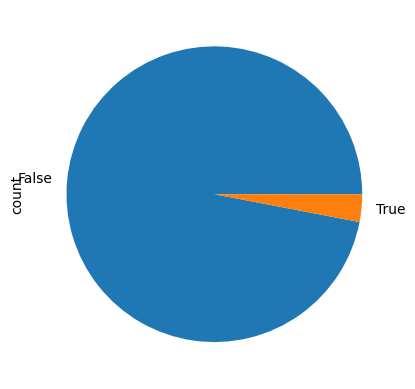

In [21]:
df['Cancelled'].value_counts().plot.pie()

In [22]:
df['Cancelled'].unique()

array([False,  True])

Understand the DepDelayMinutes Variable

Distribution of Flight Delays which are less than 30 Min

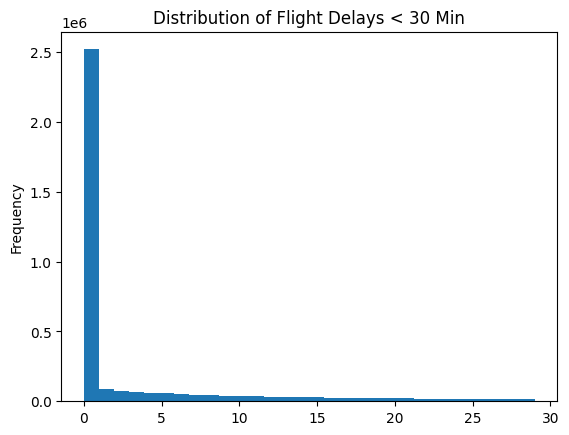

In [23]:
import matplotlib.pyplot as plt
a = df[df["DepDelayMinutes"] < 30]
# Plotting the histogram
a["DepDelayMinutes"].plot(kind="hist",bins=30, title="Distribution of Flight Delays < 30 Min")
plt.show()

The x-axis represents the range of delay
intervals. Since the bins parameter is set to 30, there will be 30 bins representing different delay intervals.

The y-axis represents the frequency or count of flights falling within each delay interval.

Distribution of Flight Delays from 2 minute delay to 60 minute delay

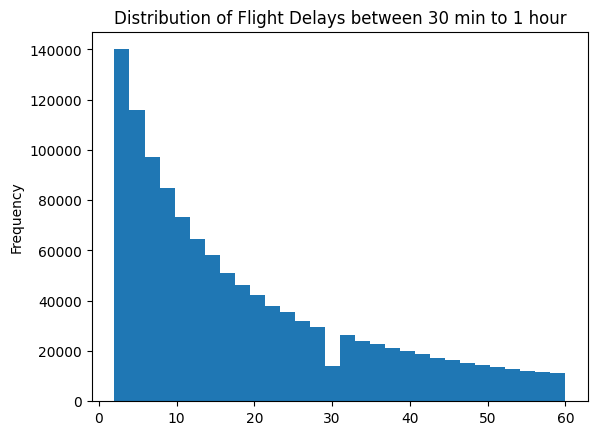

In [24]:
delay=np.where((df["DepDelayMinutes"]> 1) & (df["DepDelayMinutes"] < 61))
delaydf=df.iloc[delay]
delaydf["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays between 30 min to 1 hour"
)
plt.show()

**Grouping of Delays**


Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay) and "Cancelled.

In [25]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[(df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"] = "Small_Delay"
df.loc[(df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

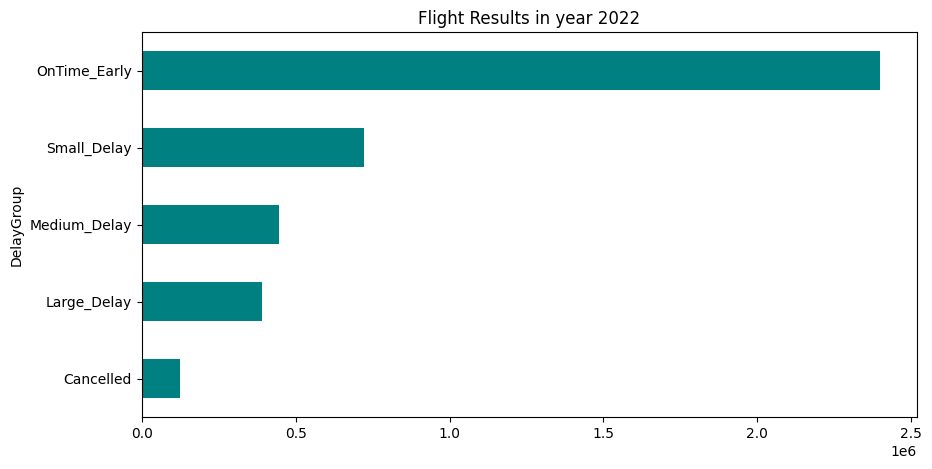

In [26]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color='teal', title="Flight Results in year 2022")
plt.show()

In [27]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

In [28]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts().unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2022,239809800,72212200,44561900,38928700,12319200


Results of delay per Month

In [29]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,61.098881,14.763799,9.211388,8.599045,6.326886
2,60.177863,17.160815,9.929570,8.227298,4.504454
3,59.825381,18.384128,11.036133,9.212046,1.542312
4,58.768374,18.081649,11.158903,9.682400,2.308673
5,59.189485,18.870387,11.001576,8.949498,1.989054
6,55.175839,18.707365,12.124599,10.923883,3.068314
7,57.753196,17.738651,11.765542,10.943454,1.799156


In [30]:
# pip install calmap


Plot using calmap

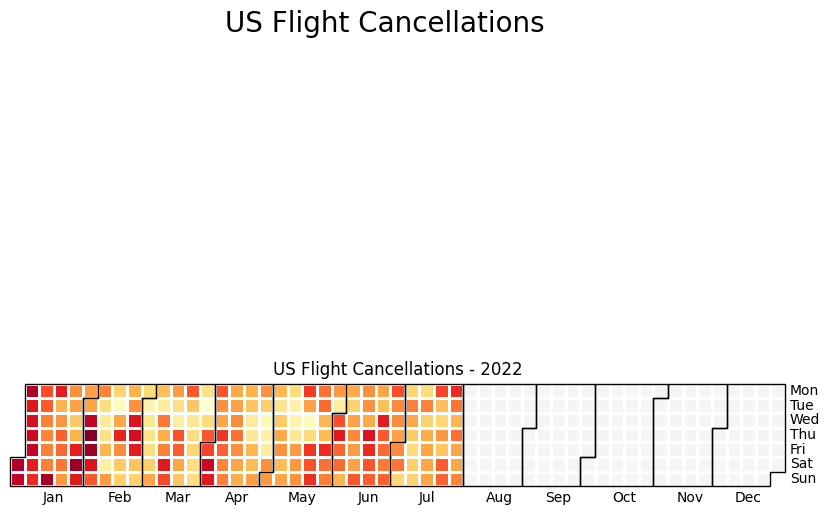

In [31]:
import calmap
# Group events by 'FlightDate' and calculate the mean of 'Cancelled' flights for each date
events = df.groupby("FlightDate")["Cancelled"].mean()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define the year for the plot
year = 2022

# Create the year plot using calmap for the year 2022 only
calmap.yearplot(
    events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=ax
)

# Set the title for the plot
ax.set_title("US Flight Cancellations - " + str(year))

# Set the face color of the figure
fig.patch.set_facecolor("white")

# Set the main title for the entire figure
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

# Show the plot
plt.show()

Lighter colors (e.g., yellow) indicate days with fewer flight cancellations.
Darker colors (e.g., red) indicate days with a higher frequency of flight cancellations.

Comparing different Airlines
Who has the most delays?
Who has the most cancellations?
Who is the most reliable? (on time)

Text(0.5, 0, 'Flights (100k)')

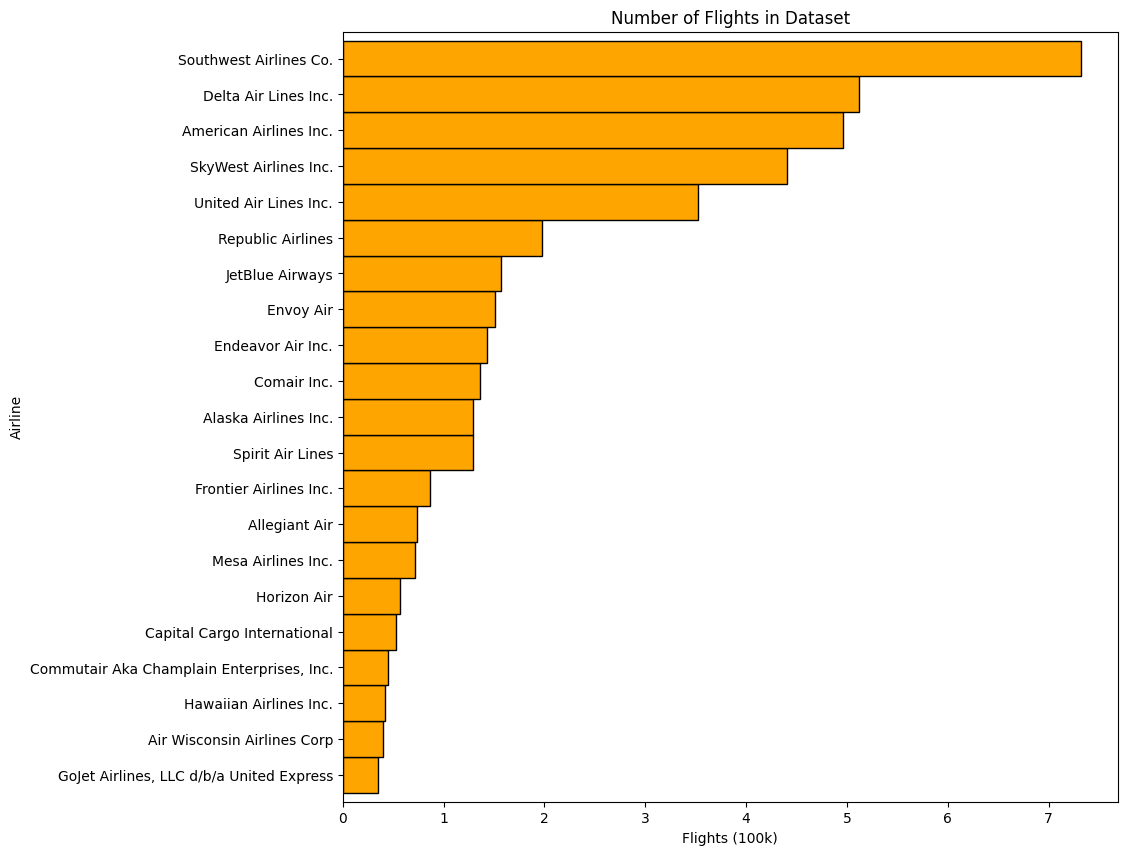

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color='orange', width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

We tae te Top Airlines(having minimum 1M flight to compare

In [33]:
# Get the top airlines with more than 1,000,000 flights
top_airlines = df['Airline'].value_counts().nlargest(n=1_000_000).index.tolist()

# Filter the DataFrame to only include rows with the top airlines
df_top = df[df['Airline'].isin(top_airlines)].reset_index(drop=True)


In [34]:
# top_airlines = (
#     df["Airline"]
#     .value_counts()
#     .reset_index()
#     .query("Airline > 1_000_000")["index"]
#     .values.tolist()
# )

# df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [35]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

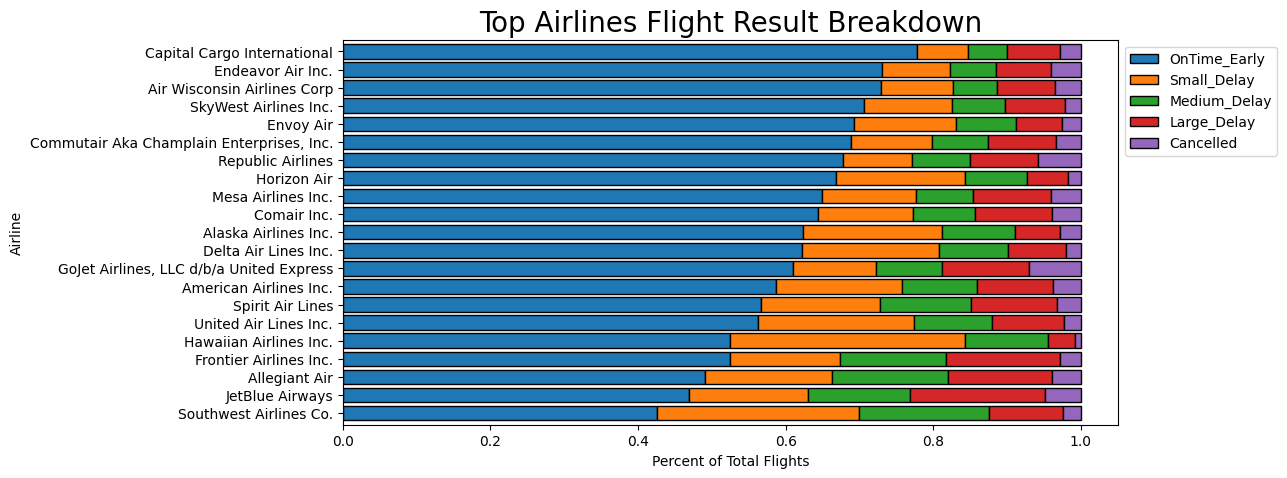

In [36]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 62 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                     

In [38]:
df["Cancelled"].unique()

array([False,  True])

In [39]:
# Get the names of columns with dtype 'object'
# object_cols = df.select_dtypes(include=['object']).columns

In [40]:
# object_cols

In [41]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Select object columns
object_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each column
for col in object_cols:
    df[col] = le.fit_transform(df[col])


In [42]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Select boolean columns
bool_cols = df.select_dtypes(include=['bool']).columns

# Apply LabelEncoder to each column
for col in bool_cols:
    df[col] = le.fit_transform(df[col])


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 62 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  int32         
 2   Origin                                   int32         
 3   Dest                                     int32         
 4   Cancelled                                int64         
 5   Diverted                                 int64         
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                          float64       
 12  AirTime                     

In [44]:
df['DelayGroup'].unique()

array([3, 4, 2, 1, 0])

In [45]:
# corr_matrix = df.corr()
# print(corr_matrix["DelayGroup"].sort_values(ascending=False))

In [46]:
corr_matrix = df.corr()
print(corr_matrix["DepDelay"].sort_values(ascending=False))

DepDelay                                   1.000000
DepDelayMinutes                            0.997936
ArrDelayMinutes                            0.972252
ArrDelay                                   0.963605
DepartureDelayGroups                       0.823021
ArrivalDelayGroups                         0.772093
DepDel15                                   0.549358
ArrDel15                                   0.509031
DepTime                                    0.125368
WheelsOff                                  0.115773
DepTimeBlk                                 0.098832
CRSDepTime                                 0.098278
ArrTimeBlk                                 0.082121
CRSArrTime                                 0.074811
TaxiOut                                    0.045916
DayOfWeek                                  0.029806
ActualElapsedTime                          0.029315
Month                                      0.029270
FlightDate                                 0.027471
Quarter     

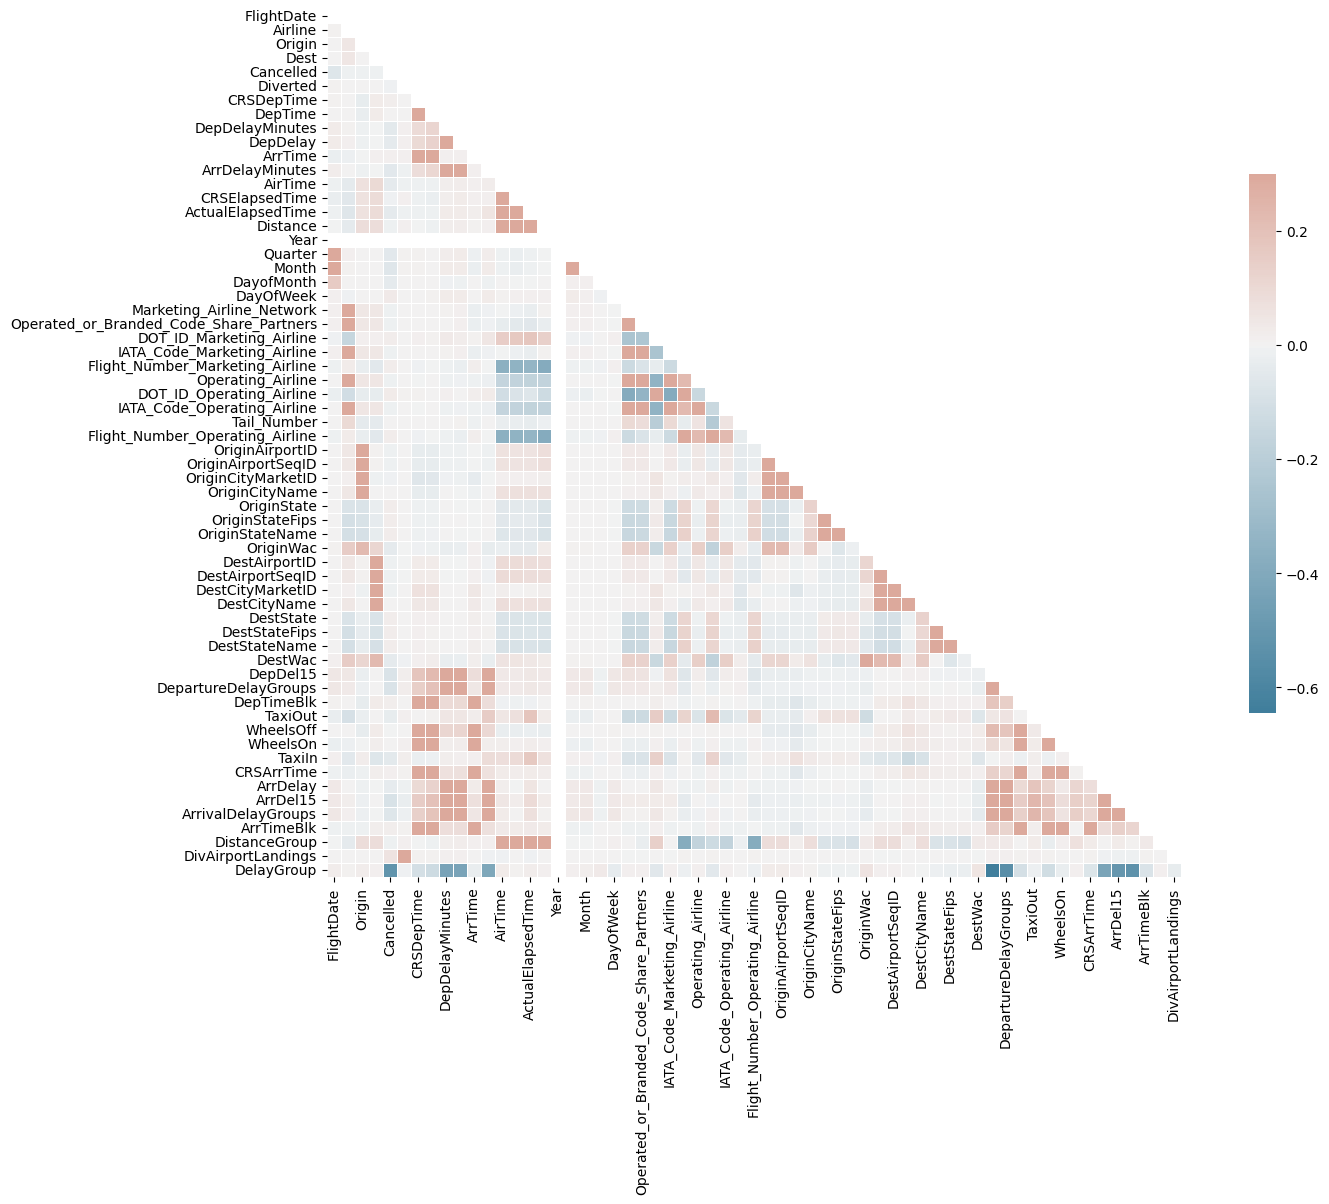

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Selecting the features. Here, I'm assuming that the columns with correlation greater than 0.1 with DepDelay are the features.
features = df.columns[df.corr()['DepDelay'].abs() > 0.1]

In [46]:
features

Index(['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'DelayGroup'],
      dtype='object')

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['DepDelay'], test_size=0.2, random_state=42)


In [75]:
# Create a Random Forest Regressor
regr = RandomForestRegressor(n_estimators=5,max_depth=10, random_state=0)

# Train the model
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=5, random_state=0)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [77]:


# Assuming that regr is your trained model and X_test, y_test are your testing data

# Use the model to make predictions
y_pred = regr.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.0033188464801409494
Mean Squared Error (MSE): 0.07132807684251867
Root Mean Squared Error (RMSE): 0.2670731675824411


In [78]:
# Get feature importances
importances = regr.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


                 Feature    Importance
2               DepDelay  5.265213e-01
1        DepDelayMinutes  4.704268e-01
7               ArrDelay  2.158617e-03
3        ArrDelayMinutes  5.950913e-04
5   DepartureDelayGroups  2.601521e-04
6              WheelsOff  3.749393e-05
0                DepTime  3.406523e-07
4               DepDel15  2.595327e-07
8               ArrDel15  0.000000e+00
9     ArrivalDelayGroups  0.000000e+00
10            DelayGroup  0.000000e+00


In [79]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [5, 10],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomForestRegressor
regr = RandomForestRegressor()

# Create the grid search object
grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestRegressor with the best parameters
regr_best = RandomForestRegressor(**best_params)

# Fit the new model
regr_best.fit(X_train, y_train)


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_pa

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=5)

In [80]:
# Use the model to make predictions
y_pred = regr_best.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.5843776046375979
Mean Squared Error (MSE): 1.2779324517233355
Root Mean Squared Error (RMSE): 1.1304567447378673


In [50]:
import pickle

In [60]:

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(regr_best, file)


In [51]:
# Load the model from a file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [71]:
# Use the loaded model to make predictions
y_pred_R = loaded_model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 8.270045841686116
Mean Squared Error (MSE): 424.9984644758005
Root Mean Squared Error (RMSE): 20.615490886122515


In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [56]:
# Create a DMatrix from the training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameters for the XGBoost model
params = {
    'max_depth': 6,
    'objective': 'reg:squarederror',  # regression task
    'eval_metric': 'rmse',  # root mean square error
}

# Train the model
model = xgb.train(params, dtrain)

# Create a DMatrix from the testing data
dtest = xgb.DMatrix(X_test)


RMSE: 9.852697810510318


In [57]:
# Use the model to make predictions
y_pred = model.predict(dtest)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.9300226844995837
Mean Squared Error (MSE): 97.0756541452348
Root Mean Squared Error (RMSE): 9.852697810510318


In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [5,10]
}

# Create a XGBRegressor
model = xgb.XGBRegressor()

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new XGBRegressor with the best parameters
model_best_xbg = xgb.XGBRegressor(**best_params)

# Fit the new model
model_best_xbg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:

# Use the model to make predictions
y_pred = model_best_xbg.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 8.270045841686116
Mean Squared Error (MSE): 424.9984644758005
Root Mean Squared Error (RMSE): 20.615490886122515


In [64]:
df["DepDelay"].unique().shape

(1605,)

In [82]:
# y_test[:10]

In [ ]:
# y_pred_R[:10]

In [81]:
# Use the RandomForestRegressor model to make predictions
y_pred_rf = regr_best.predict(X_test)

# Calculate the metrics for the RandomForestRegressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)

print("RandomForestRegressor Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

# Use the XGBoost model to make predictions
y_pred_xgb = model_best_xbg.predict(X_test)

# Calculate the metrics for the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)

print("\nXGBoost Model Evaluation")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")


RandomForestRegressor Model Evaluation
Mean Absolute Error (MAE): 0.5843776046375979
Mean Squared Error (MSE): 1.2779324517233355
Root Mean Squared Error (RMSE): 1.1304567447378673

XGBoost Model Evaluation
Mean Absolute Error (MAE): 8.270045841686116
Mean Squared Error (MSE): 424.9984644758005
Root Mean Squared Error (RMSE): 20.615490886122515


In [47]:
# Selecting the features. Here, I'm assuming that the columns with correlation greater than 0.1 with DepDelay are the features.
features = df.columns[df.corr()['DepDelay'].abs() > 0.1]

In [51]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[features], df['DepDelay'], test_size=0.2, random_state=42)


# # Create a Sequential model
# model = Sequential()
# # Add an input layer 
# model.add(Dense(64, activation='relu', input_shape=(len(X_train.columns),)))
# # Add one hidden layer 
# model.add(Dense(64, activation='relu'))
# # Add dropout regularization
# model.add(Dropout(0.5))
# # Add another hidden layer
# model.add(Dense(64, activation='relu'))
# # Add dropout regularization
# model.add(Dropout(0.5))
# # Add an output layer 
# model.add(Dense(1))
# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam')
# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


In [56]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


# Selecting the features. Here, I'm assuming that the columns with correlation greater than 0.1 with DepDelay are the features.
# features = df.columns[df.corr()['DepDelay'].abs() > 0.1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['DepDelay'], test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(len(X_train.columns),)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10000, verbose=1)


Epoch 1/10
327/327 [==============================] - 2s 3ms/step - loss: 5073.4360
Epoch 2/10
327/327 [==============================] - 1s 3ms/step - loss: 19.4221
Epoch 3/10
327/327 [==============================] - 1s 3ms/step - loss: 11.1022
Epoch 4/10
327/327 [==============================] - 1s 3ms/step - loss: 6.1032
Epoch 5/10
327/327 [==============================] - 1s 3ms/step - loss: 4.5443
Epoch 6/10
327/327 [==============================] - 1s 3ms/step - loss: 3.8180
Epoch 7/10
327/327 [==============================] - 2s 5ms/step - loss: 3.3550
Epoch 8/10
327/327 [==============================] - 1s 3ms/step - loss: 2.9447
Epoch 9/10
327/327 [==============================] - 1s 3ms/step - loss: 2.5588
Epoch 10/10
327/327 [==============================] - 1s 3ms/step - loss: 2.1923


In [57]:
# Use the model to make predictions
y_pred_ANN = model.predict(X_test)



25490/25490 [==============================] - 44s 2ms/step


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred_ANN)
mse = mean_squared_error(y_test, y_pred_ANN)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.930345194387275
Mean Squared Error (MSE): 1.9607913105861383
Root Mean Squared Error (RMSE): 1.4002825824047582
